Xử lý bài toán cân nặng theo `PyTorch`

In [136]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# height (cm), input data, each row is a data point
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

# Convert NumPy arrays to PyTorch tensors
# X = torch.tensor(X, dtype=torch.float32)
# y = torch.tensor(y, dtype=torch.float32).view(-1)  # Ensure y is a 1D tensor

X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))
#y = y.view(y.shape[0], 1)


#-----------------------------------------#
#X = torch.tensor([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]], dtype=torch.float32).T
#y = torch.tensor([49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68], dtype=torch.float32)


print(X)
print(y)

tensor([[147.],
        [150.],
        [153.],
        [158.],
        [163.],
        [165.],
        [168.],
        [170.],
        [173.],
        [175.],
        [178.],
        [180.],
        [183.]])
tensor([49., 50., 51., 54., 58., 59., 60., 62., 63., 64., 66., 67., 68.])


`view(-1, 1)` là một phương thức trong PyTorch được sử dụng để thay đổi hình dạng của tensor sao cho tensor mới có một cột và số hàng được tính tự động để duy trì tổng số phần tử ban đầu.

`dim` (dimension) là một tham số quan trọng trong các hàm và phương thức để xác định trục hoặc chiều mà thao tác sẽ được thực hiện. `dim = 0` sẽ nối các tensor theo chiều dọc, `dim = 1` sẽ nối các tensor theo chiều ngang.

`X.shape[0]`  Lấy số hàng của x
`X.shape[1]`  Lấy số cột của x


In [155]:
# Building Xbar
ones = torch.ones((X.shape[0], 1), dtype=torch.float32)
Xbar = torch.cat((ones, X), dim=1)  # each point is one row

# Calculating weights of the fitting line using PyTorch
A = torch.mm(Xbar.T, Xbar)
b = torch.mm(Xbar.T, y.view(-1, 1))
w = torch.mm( torch.pinverse(A), b)
w = w.view(1, -1)
print(w)

# Extract weights
w_0, w_1 = w[0][0].item(), w[0][1].item()

tensor([[-34.0293,   0.5610]])


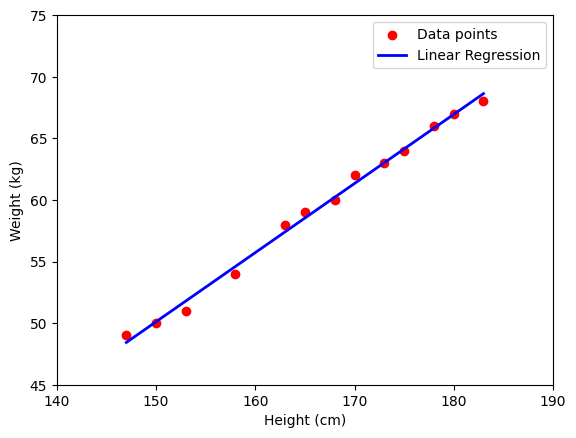

In [156]:
# Predicted values for the entire dataset
y_pred = w_1 * X + w_0

# Plot the data points
plt.scatter(X.numpy(), y.numpy(), color='red', label='Data points')

# Plot the fitted line
plt.plot(X.numpy(), y_pred.numpy(), color='blue', linewidth=2, label='Linear Regression')

# Set the x and y axis limits
plt.xlim(140, 190)
plt.ylim(45, 75)

# Set the x and y axis ticks with specified intervals
plt.xticks(np.arange(140, 191, 10))
plt.yticks(np.arange(45, 76, 5))

# Add labels and legend
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()

# Show the plot
plt.show()


In [148]:
# Predictions for specific heights
height_1 = 155
height_2 = 160
y1 = w_1 * height_1 + w_0
y2 = w_1 * height_2 + w_0

print(f'Input {height_1}cm, true output 52kg, predicted output {y1:.2f}kg')
print(f'Input {height_2}cm, true output 56kg, predicted output {y2:.2f}kg')

Input 155cm, true output 52kg, predicted output 52.92kg
Input 160cm, true output 56kg, predicted output 55.72kg
